In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from sklearn .metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import BatchNormalization
import os

In [6]:
df= pd.read_csv("fashion-mnist_train.csv")  
df1= pd.read_csv("fashion-mnist_test.csv")

In [7]:
df1.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0


In [8]:
df.shape,df1.shape

((60000, 785), (10000, 785))

In [9]:
x_train=df.drop('label',1) 
xtrain=np.array(x_train)
y_train=df['label']

x_test=df1.drop('label',1)
xtest=np.array(x_test)
y_test=df1['label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [10]:
xtrain = xtrain/255.0   # scaling the data within (0,1)
xtest = xtest/255.0

In [11]:
clothing=  {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


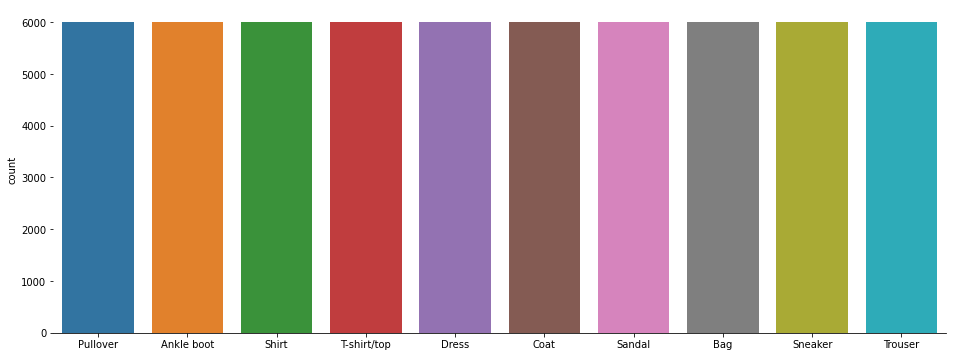

In [12]:
label = []
for i in range(len(y_train)):
    label.append(clothing[y_train[i]])
    
fig = plt.figure(figsize=(16,6))
sns.countplot(label)
sns.despine(left=True)
plt.show()

In [13]:
ytrain= keras.utils.np_utils.to_categorical(y_train,num_classes=10)
ytest=keras.utils.np_utils.to_categorical(y_test,num_classes=10)

In [14]:
l=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [15]:
Xtrain=xtrain.reshape(-1,28,28,1)
Xtest=xtest.reshape(-1,28,28,1)
Xtrain.shape, Xtest.shape
ytrain.shape, ytest.shape, Xtrain[0].shape

((60000, 10), (10000, 10), (28, 28, 1))

In [18]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5),padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(Xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2))) 
#model.add(BatchNormalization())

model.add(Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'))
#model.add(Dropout(0.5))
#model.add(MaxPooling2D(pool_size=(2, 2)))


# ANN-LAYERS
model.add(Flatten())

model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.5))


# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam()
#rms = RMSprop(learning_rate=0.00004, decay=1e-6, rho=0.92)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [19]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)        

In [20]:
hist = model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest),epochs=10,batch_size=128,verbose=1)


Epoch 1/10
469/469 [==============================] - 44s 91ms/step - loss: 0.5419 - accuracy: 0.8040 - val_loss: 0.4145 - val_accuracy: 0.8620
Epoch 2/10
469/469 [==============================] - 38s 82ms/step - loss: 0.3761 - accuracy: 0.8638 - val_loss: 0.3523 - val_accuracy: 0.8825
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 0.3309 - accuracy: 0.8786 - val_loss: 0.3438 - val_accuracy: 0.8844
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.3067 - accuracy: 0.8867 - val_loss: 0.3045 - val_accuracy: 0.8990
Epoch 5/10
469/469 [==============================] - 38s 82ms/step - loss: 0.2910 - accuracy: 0.8920 - val_loss: 0.2907 - val_accuracy: 0.9024
Epoch 6/10
469/469 [==============================] - 38s 81ms/step - loss: 0.2750 - accuracy: 0.8975 - val_loss: 0.2765 - val_accuracy: 0.9040
Epoch 7/10
469/469 [==============================] - 38s 82ms/step - loss: 0.2631 - accuracy: 0.9018 - val_loss: 0.2732 - val_accuracy:

In [21]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

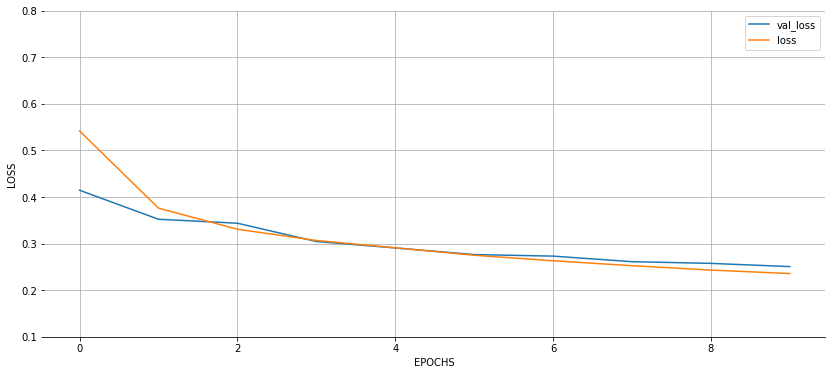

In [22]:
fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()


Value Accuracy |  91.45 %


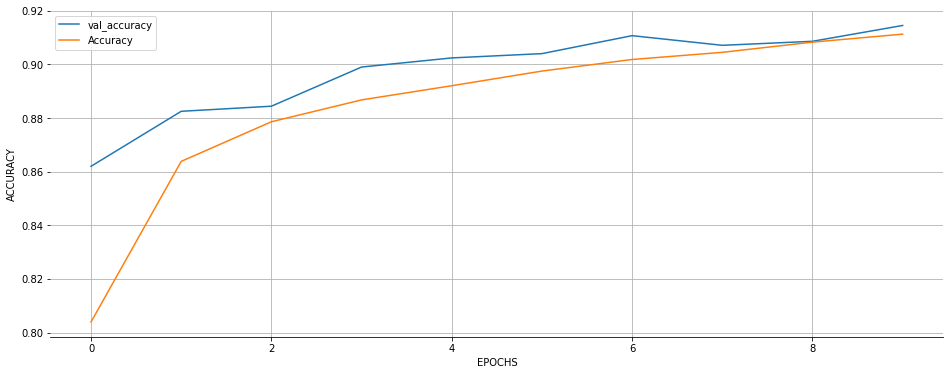

In [23]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

## Siamese networks

In [26]:
x_train = x_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
x_test =x_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
y_train = y_train.values.astype('int')
y_test = y_test.values.astype('int')
print('Training', x_train.shape, x_train.max())
print('Testing', x_test.shape, x_test.max())

Training (60000, 28, 28, 1) 1.0
Testing (10000, 28, 28, 1) 1.0


In [27]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [28]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1]*batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize
            
        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

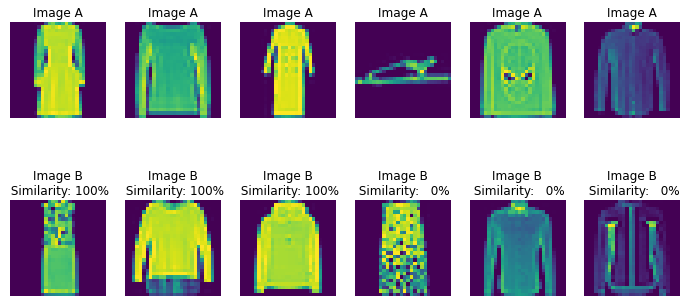

In [29]:
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')

In [30]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout
img_in = Input(shape = x_train.shape[1:], name = 'FeatureNet_ImageInput')
n_layer = img_in
for i in range(2):
    n_layer = Conv2D(8*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = Conv2D(16*2**i, kernel_size = (3,3), activation = 'linear')(n_layer)
    n_layer = BatchNormalization()(n_layer)
    n_layer = Activation('relu')(n_layer)
    n_layer = MaxPool2D((2,2))(n_layer)
n_layer = Flatten()(n_layer)
n_layer = Dense(32, activation = 'linear')(n_layer)
n_layer = Dropout(0.5)(n_layer)
n_layer = BatchNormalization()(n_layer)
n_layer = Activation('relu')(n_layer)
feature_model = Model(inputs = [img_in], outputs = [n_layer], name = 'FeatureGenerationModel')
feature_model.summary()

Model: "FeatureGenerationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeatureNet_ImageInput (Inpu  [(None, 28, 28, 1)]      0         
 tLayer)                                                         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 8)        32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 8)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24,

In [31]:
from keras.layers import concatenate
img_a_in = Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = Input(shape = x_train.shape[1:], name = 'ImageB_Input')
img_a_feat = feature_model(img_a_in)
img_b_feat = feature_model(img_b_in)
combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)
similarity_model = Model(inputs = [img_a_in, img_b_in], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ImageA_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 ImageB_Input (InputLayer)      [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 FeatureGenerationModel (Functi  (None, 32)          25040       ['ImageA_Input[0][0]',           
 onal)                                                            'ImageB_Input[0][0]']           
                                                                                                  
 merge_features (Concatenate)   (None, 64)           0           ['FeatureGeneratio

In [32]:
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


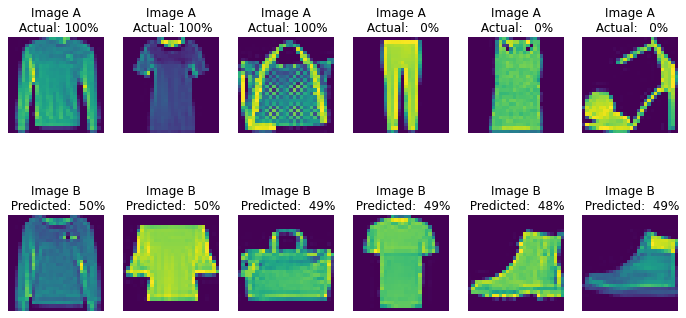

In [33]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([pv_a, pv_b])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig
# a completely untrained model
_ = show_model_output()

In [34]:
# make a generator out of the data
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        yield [pv_a, pv_b], pv_sim
# we want a constant validation group to have a frame of reference for model performance
valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit(siam_gen(train_groups), 
                               steps_per_epoch = 500,
                                               epochs = 10,
                                             verbose = True)

Epoch 1/10
500/500 [==============================] - 59s 113ms/step - loss: 0.6675 - accuracy: 0.5809
Epoch 2/10
500/500 [==============================] - 59s 119ms/step - loss: 0.5187 - accuracy: 0.7407
Epoch 3/10
500/500 [==============================] - 60s 120ms/step - loss: 0.4397 - accuracy: 0.7982
Epoch 4/10
500/500 [==============================] - 57s 113ms/step - loss: 0.4132 - accuracy: 0.8133
Epoch 5/10
500/500 [==============================] - 58s 116ms/step - loss: 0.3891 - accuracy: 0.8270
Epoch 6/10
500/500 [==============================] - 55s 110ms/step - loss: 0.3911 - accuracy: 0.8223
Epoch 7/10
500/500 [==============================] - 57s 113ms/step - loss: 0.3797 - accuracy: 0.8306
Epoch 8/10
500/500 [==============================] - 57s 114ms/step - loss: 0.3724 - accuracy: 0.8338
Epoch 9/10
500/500 [==============================] - 57s 114ms/step - loss: 0.3701 - accuracy: 0.8355
Epoch 10/10
500/500 [==============================] - 56s 112ms/step - l

In [35]:
test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

ValueError: ignored

In [36]:
train_acc = model.evaluate(x_train, y_train)

print('Test accuracy:', train_acc)

ValueError: ignored

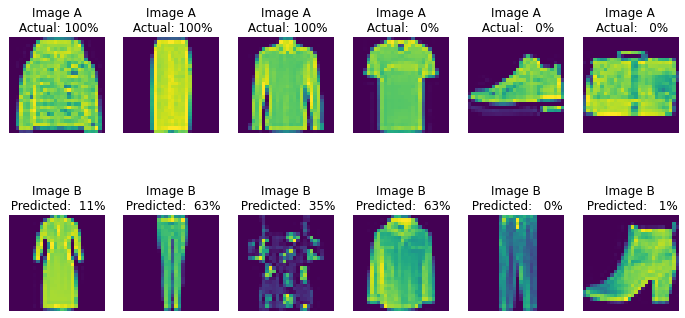

In [37]:
_ = show_model_output()


In [39]:
x_test_features = feature_model.predict(x_test, verbose = True, batch_size=128)


79/79 [==============================] - 7s 80ms/step


In [40]:
%%time
from sklearn.manifold import TSNE
tsne_obj = TSNE(n_components=2,
                         init='pca',
                         random_state=101,
                         method='barnes_hut',
                         n_iter=500,
                         verbose=2)
tsne_features = tsne_obj.fit_transform(x_test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.895s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.125911
[t-SNE] Computed conditional probabilities in 0.522s


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Iteration 50: error = 76.0725479, gradient norm = 0.0028935 (50 iterations in 4.470s)
[t-SNE] Iteration 100: error = 74.4525299, gradient norm = 0.0016850 (50 iterations in 5.161s)
[t-SNE] Iteration 150: error = 73.6676483, gradient norm = 0.0011763 (50 iterations in 5.554s)
[t-SNE] Iteration 200: error = 73.1979675, gradient norm = 0.0008978 (50 iterations in 4.183s)
[t-SNE] Iteration 250: error = 72.8922577, gradient norm = 0.0007527 (50 iterations in 4.192s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.892258
[t-SNE] Iteration 300: error = 2.5572619, gradient norm = 0.0012934 (50 iterations in 4.357s)
[t-SNE] Iteration 350: error = 2.0522161, gradient norm = 0.0005899 (50 iterations in 4.375s)
[t-SNE] Iteration 400: error = 1.8008521, gradient norm = 0.0003538 (50 iterations in 4.246s)
[t-SNE] Iteration 450: error = 1.6540463, gradient norm = 0.0002448 (50 iterations in 4.369s)
[t-SNE] Iteration 500: error = 1.5576644, gradient norm = 0.0001820 (50 

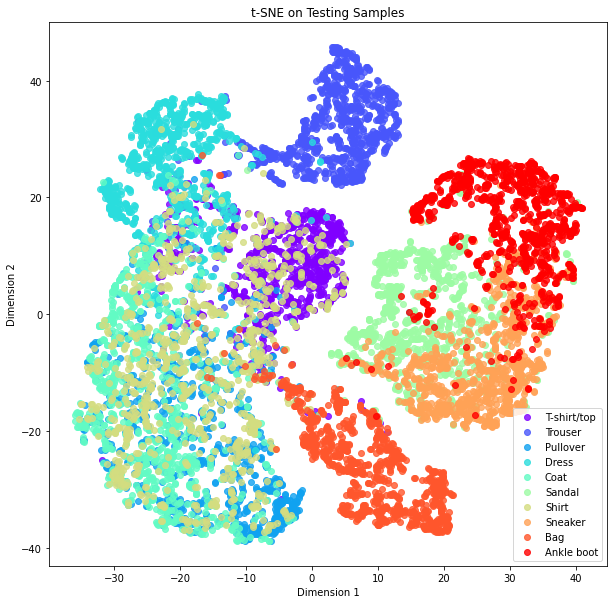

In [44]:
obj_categories = ['T-shirt/top','Trouser','Pullover','Dress',  'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ] 
colors = plt.cm.rainbow(np.linspace(0, 1, 10)) 
plt.figure(figsize=(10, 10))
for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
  plt.scatter(tsne_features[np.where(y_test == c_group), 0],  tsne_features[np.where(y_test == c_group), 1],  marker='o', 
  color=c_color, 
  linewidth='1', 
  alpha=0.8, 
  label=c_label) 
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.title('t-SNE on Testing Samples') 
plt.legend(loc='best')  
plt.show(block=False)